# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Dataset

In [2]:
# Load dataset from CSV
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# dropping the Id column
df.drop(columns=["Id"], inplace=True)

In [4]:
# Checking for missing values
df.isnull().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


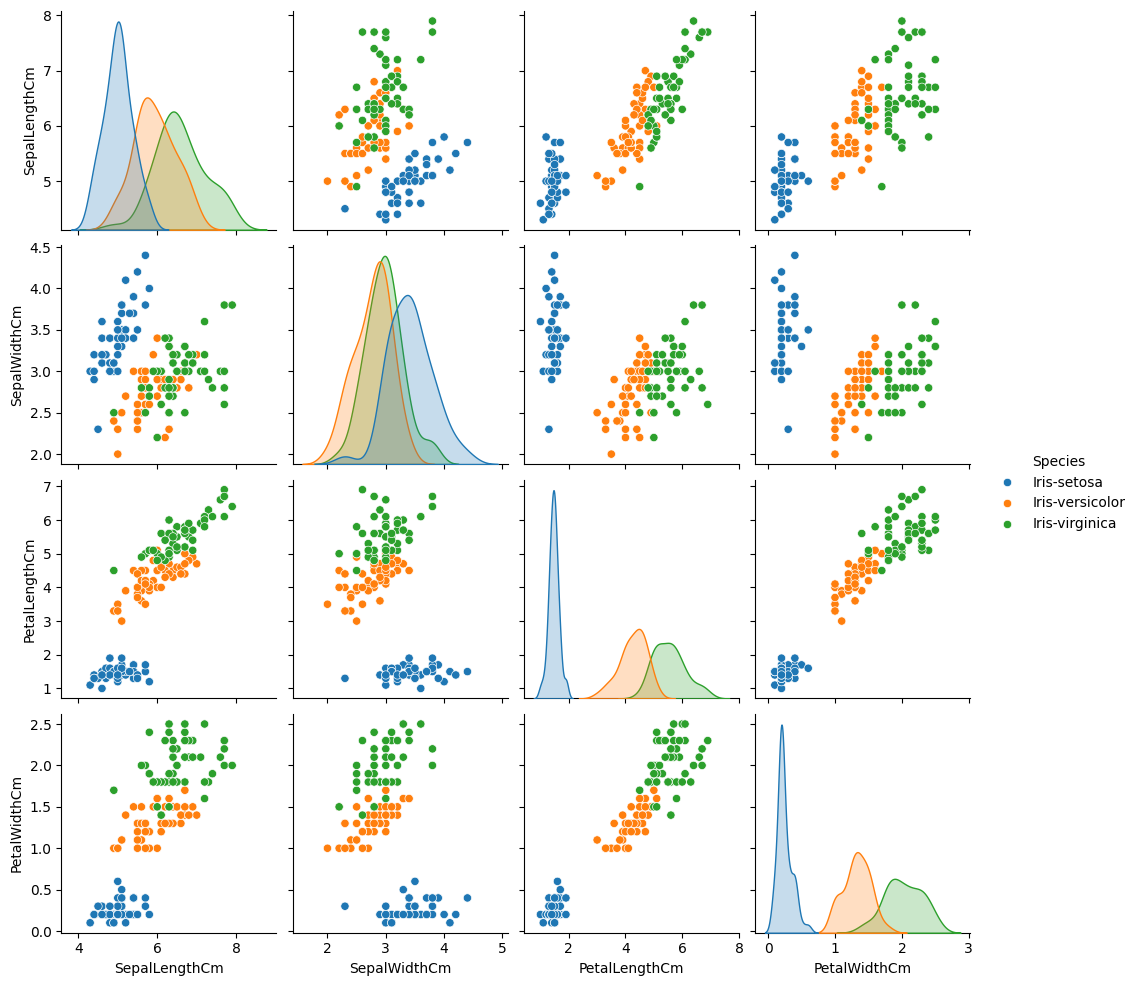

In [5]:
# plotting the pairplot
sns.pairplot(df, hue="Species")
plt.show()

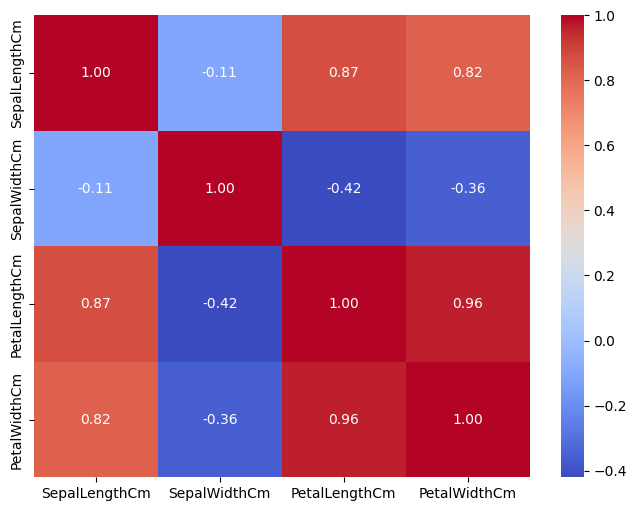

In [6]:
# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=["Species"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Preprocessing 

In [7]:
# Splitting the dataset into features and target
X = df.drop(columns=['Species'])  # Features
y = df['Species']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection

## KNN

KNN (k=1) Cross-Validation Accuracy: 0.9609
KNN (k=2) Cross-Validation Accuracy: 0.9145
KNN (k=3) Cross-Validation Accuracy: 0.9509
KNN (k=4) Cross-Validation Accuracy: 0.9336
KNN (k=5) Cross-Validation Accuracy: 0.9527
KNN (k=6) Cross-Validation Accuracy: 0.9436
KNN (k=7) Cross-Validation Accuracy: 0.9527
KNN (k=8) Cross-Validation Accuracy: 0.9427
KNN (k=9) Cross-Validation Accuracy: 0.9609
KNN (k=10) Cross-Validation Accuracy: 0.9618
KNN (k=11) Cross-Validation Accuracy: 0.9709
KNN (k=12) Cross-Validation Accuracy: 0.9527
KNN (k=13) Cross-Validation Accuracy: 0.9709
KNN (k=14) Cross-Validation Accuracy: 0.9609
KNN (k=15) Cross-Validation Accuracy: 0.9609
KNN (k=16) Cross-Validation Accuracy: 0.9718
KNN (k=17) Cross-Validation Accuracy: 0.9618
KNN (k=18) Cross-Validation Accuracy: 0.9527
KNN (k=19) Cross-Validation Accuracy: 0.9527


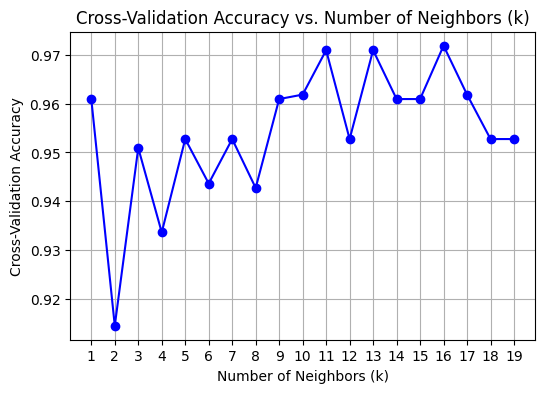

Best k based on cross-validation: 16 with accuracy: 0.9718
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Perform k-fold cross-validation
k_values = range(1, 20)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"KNN (k={k}) Cross-Validation Accuracy: {scores.mean():.4f}")

# Plotting Cross-Validation Accuracies
plt.figure(figsize=(6, 4))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k based on cross-validation
best_k_cv = k_values[cv_scores.index(max(cv_scores))]
print(f"Best k based on cross-validation: {best_k_cv} with accuracy: {max(cv_scores):.4f}")

# Train the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k_cv)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

## Descision Tree

Decision Tree (max_depth=1) Cross-Validation Accuracy: 0.6182
Decision Tree (max_depth=2) Cross-Validation Accuracy: 0.9618
Decision Tree (max_depth=3) Cross-Validation Accuracy: 0.9809
Decision Tree (max_depth=4) Cross-Validation Accuracy: 0.9709
Decision Tree (max_depth=5) Cross-Validation Accuracy: 0.9709
Decision Tree (max_depth=6) Cross-Validation Accuracy: 0.9809
Decision Tree (max_depth=7) Cross-Validation Accuracy: 0.9709
Decision Tree (max_depth=8) Cross-Validation Accuracy: 0.9709
Decision Tree (max_depth=9) Cross-Validation Accuracy: 0.9809
Decision Tree (max_depth=10) Cross-Validation Accuracy: 0.9709
Decision Tree (max_depth=11) Cross-Validation Accuracy: 0.9809
Decision Tree (max_depth=12) Cross-Validation Accuracy: 0.9709
Decision Tree (max_depth=13) Cross-Validation Accuracy: 0.9709
Decision Tree (max_depth=14) Cross-Validation Accuracy: 0.9809
Decision Tree (max_depth=15) Cross-Validation Accuracy: 0.9809
Decision Tree (max_depth=16) Cross-Validation Accuracy: 0.9809
D

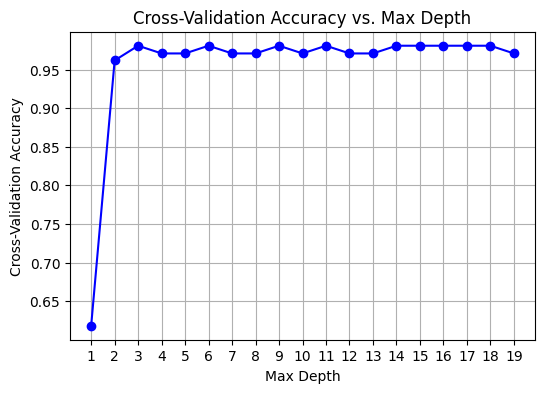

Best max_depth based on cross-validation: 3 with accuracy: 0.9809
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [9]:
from sklearn.tree import DecisionTreeClassifier

# Perform k-fold cross-validation
max_depth_values = range(1, 20)
cv_scores = []

for max_depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"Decision Tree (max_depth={max_depth}) Cross-Validation Accuracy: {scores.mean():.4f}")

# Plotting Cross-Validation Accuracies
plt.figure(figsize=(6, 4))
plt.plot(max_depth_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()

# Find the best max_depth based on cross-validation
best_max_depth_cv = max_depth_values[cv_scores.index(max(cv_scores))]
print(f"Best max_depth based on cross-validation: {best_max_depth_cv} with accuracy: {max(cv_scores):.4f}")

# Train the model with the best max_depth
dt = DecisionTreeClassifier(max_depth=best_max_depth_cv)
dt.fit(X_train, y_train)

# Predict the test set
y_pred = dt.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

## Random Forest

Random Forest (n=100) Cross-Validation Accuracy: 0.9609
Random Forest (n=200) Cross-Validation Accuracy: 0.9609
Random Forest (n=300) Cross-Validation Accuracy: 0.9609
Random Forest (n=400) Cross-Validation Accuracy: 0.9709
Random Forest (n=500) Cross-Validation Accuracy: 0.9709
Random Forest (n=600) Cross-Validation Accuracy: 0.9618
Random Forest (n=700) Cross-Validation Accuracy: 0.9709
Random Forest (n=800) Cross-Validation Accuracy: 0.9709
Random Forest (n=900) Cross-Validation Accuracy: 0.9609
Random Forest (n=1000) Cross-Validation Accuracy: 0.9609


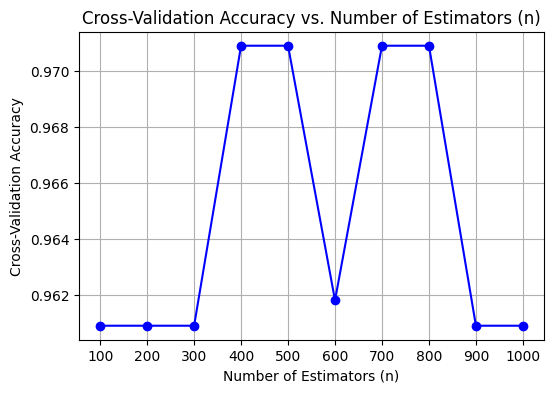

Best n based on cross-validation: 400 with accuracy: 0.9709
Best Random Forest (n=400) Accuracy: 0.9333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate the Random Forest model
n_estimators = range(100, 1001, 100)
cv_scores = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"Random Forest (n={n}) Cross-Validation Accuracy: {scores.mean():.4f}")

# Plotting Cross-Validation Accuracies
plt.figure(figsize=(6, 4))
plt.plot(n_estimators, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy vs. Number of Estimators (n)')
plt.xlabel('Number of Estimators (n)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(n_estimators)
plt.grid(True)
plt.show()

# Find the best n based on cross-validation
best_n_cv = n_estimators[cv_scores.index(max(cv_scores))]
print(f"Best n based on cross-validation: {best_n_cv} with accuracy: {max(cv_scores):.4f}")

# Train and evaluate the best Random Forest model based on cross-validation
rf = RandomForestClassifier(n_estimators=best_n_cv, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Best Random Forest (n={best_n_cv}) Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


## SVM 

SVM (C=0.1) Cross-Validation Accuracy: 0.9618
SVM (C=1) Cross-Validation Accuracy: 0.9509
SVM (C=10) Cross-Validation Accuracy: 0.9600
SVM (C=100) Cross-Validation Accuracy: 0.9609


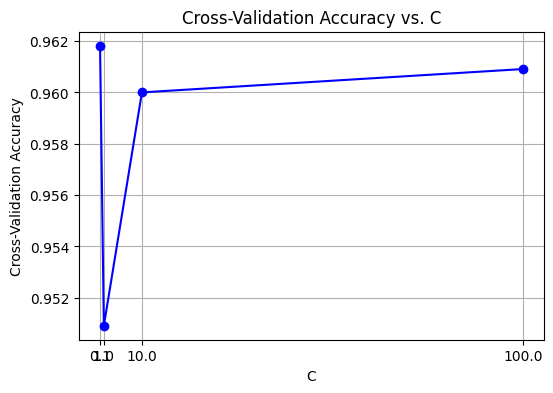

Best C based on cross-validation: 0.1 with accuracy: 0.9618
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [11]:
from sklearn.svm import SVC

# Perform k-fold cross-validation
C_values = [0.1, 1, 10, 100]
cv_scores = []

for C in C_values:
    svc = SVC(C=C, kernel='linear')
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"SVM (C={C}) Cross-Validation Accuracy: {scores.mean():.4f}")

# Plotting Cross-Validation Accuracies
plt.figure(figsize=(6, 4))
plt.plot(C_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy vs. C')
plt.xlabel('C')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(C_values)
plt.grid(True)
plt.show()

# Find the best C based on cross-validation
best_C_cv = C_values[cv_scores.index(max(cv_scores))]
print(f"Best C based on cross-validation: {best_C_cv} with accuracy: {max(cv_scores):.4f}")

# Train the model with the best C
svc = SVC(C=best_C_cv, kernel='linear')
svc.fit(X_train, y_train)

# Predict the test set
y_pred = svc.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# best model selection and evaluation

KNN Accuracy: 0.9333
KNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

KNN Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


Decision Tree Accuracy: 0.9333
Decision Tree Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

Decision Tree Confu

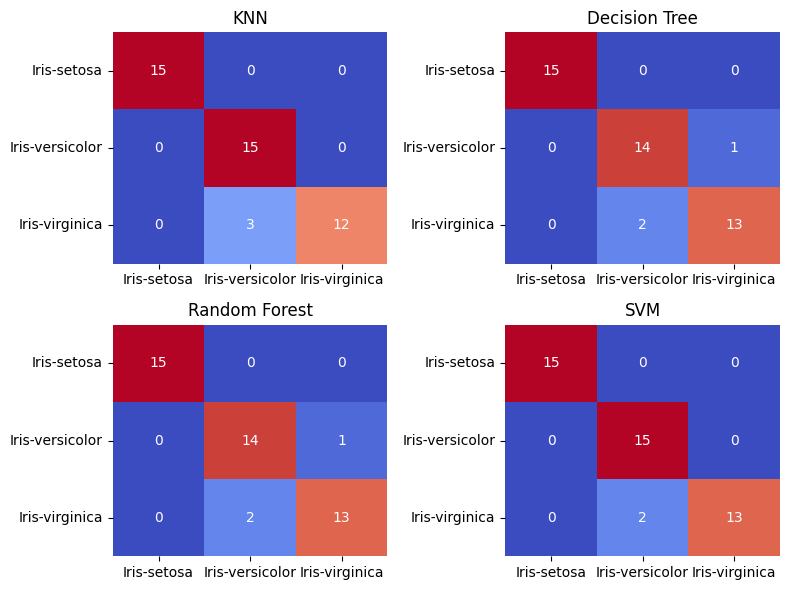

In [12]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=best_k_cv),
    "Decision Tree": DecisionTreeClassifier(max_depth=best_max_depth_cv),
    "Random Forest": RandomForestClassifier(n_estimators=best_n_cv),
    "SVM": SVC(C=best_C_cv, kernel='linear')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print("\n")

# Confusion matrix
plt.figure(figsize=(8, 6))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 2, i+1)
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, cmap="coolwarm", fmt="d", cbar=False, xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
    plt.title(name)
plt.tight_layout()
plt.show()

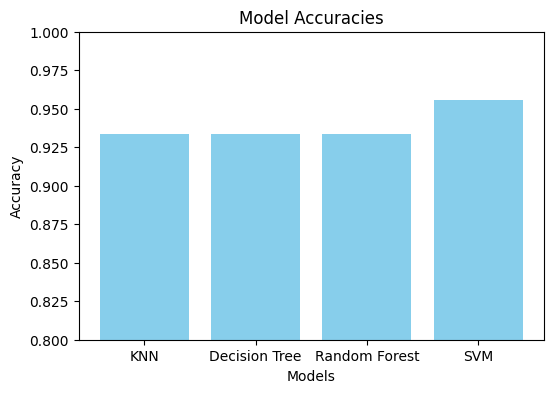

In [13]:
accuracies = []
for name, model in models.items():
    accuracies.append(accuracy_score(y_test, model.predict(X_test)))


plt.figure(figsize=(6, 4))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.8, 1)
plt.show()

Best Model: SVM with accuracy: 0.9556
SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

SVM Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


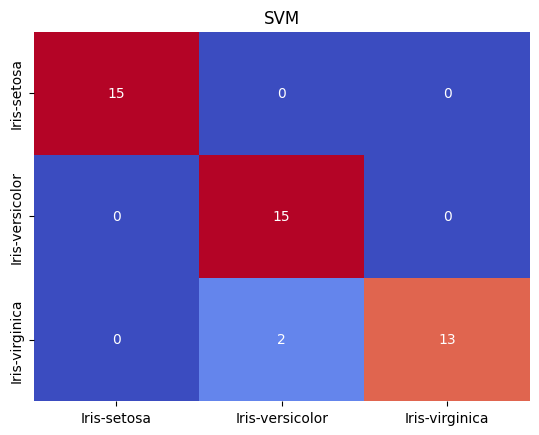

In [14]:
best_model = list(models.keys())[accuracies.index(max(accuracies))]
print(f"Best Model: {best_model} with accuracy: {max(accuracies):.4f}")

#best model evaluation
print(f"{best_model} Classification Report:\n{classification_report(y_test, models[best_model].predict(X_test))}")
print(f"{best_model} Confusion Matrix:\n{confusion_matrix(y_test, models[best_model].predict(X_test))}")

sns.heatmap(confusion_matrix(y_test, models[best_model].predict(X_test)), annot=True, cmap="coolwarm", fmt="d", cbar=False, xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.title(best_model)
plt.show()

Feature Importance:
PetalWidthCm     0.469496
PetalLengthCm    0.399235
SepalLengthCm    0.108676
SepalWidthCm     0.022592
dtype: float64


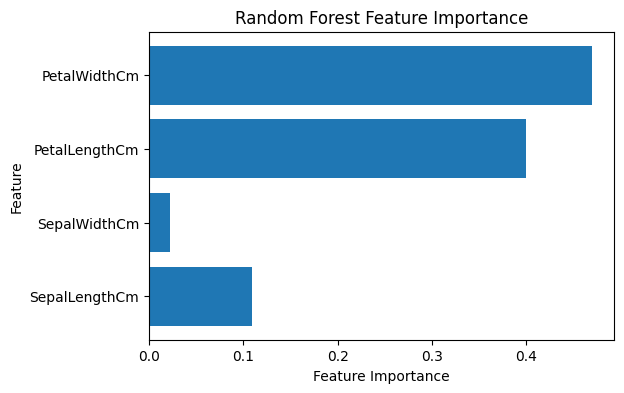

In [15]:
# Feature importance
rf = RandomForestClassifier(n_estimators=best_n_cv, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance (Using Random Forest)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importance:")
print(feature_importances)

# Plotting feature importance

plt.figure(figsize=(6, 4))
plt.barh(df.columns[:-1], rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()